In [ ]:
%pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=

In [ ]:
import medmnist

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import random

In [ ]:
dataTrain = medmnist.BreastMNIST(split="train", download=True, size=224)
dataVal   = medmnist.BreastMNIST(split="val",   download=True, size=224)
dataTest  = medmnist.BreastMNIST(split="test",  download=True, size=224)

100%|██████████| 30.9M/30.9M [00:02<00:00, 12.2MB/s]


In [ ]:
print(f'Largo de la muestra de prueba     = {len(dataTrain)}')
print(f'Largo de la muestra de validación = {len(dataVal)}')
print(f'Largo de la muestra de testeo     = {len(dataTest)}')

Largo de la muestra de prueba     = 546
Largo de la muestra de validación = 78
Largo de la muestra de testeo     = 156


In [ ]:
dataTest.info

{'python_class': 'BreastMNIST',
 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/breastmnist.npz?download=1',
 'MD5': '750601b1f35ba3300ea97c75c52ff8f6',
 'url_64': 'https://zenodo.org/records/10519652/files/breastmnist_64.npz?download=1',
 'MD5_64': '742edef2a1fd1524b2efff4bd7ba9364',
 'url_128': 'https://zenodo.org/records/10519652/files/breastmnist_128.npz?download=1',
 'MD5_128': '363e4b3f8d712e9b5de15470a2aaadf1',
 'url_224': 'https://zenodo.org/records/10519652/files/breastmnist_224.npz?download=1',
 'MD5_224

In [ ]:
x_train, y_train = np.array([i[0] for i in dataTrain]), np.array([i[1][0] for i in dataTrain])
x_val, y_val =  np.array([i[0] for i in dataVal]), np.array([i[1][0] for i in dataVal])
x_test, y_test =  np.array([i[0] for i in dataTest]), np.array([i[1][0] for i in dataTest])

In [ ]:
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

In [ ]:
datasetCompleto = []
for i in range(len(x_train)):
    datasetCompleto.append((x_train[i], y_train[i]))
for i in range(len(x_val)):
    datasetCompleto.append((x_val[i], y_val[i]))
for i in range(len(x_test)):
    datasetCompleto.append((x_test[i], y_test[i]))

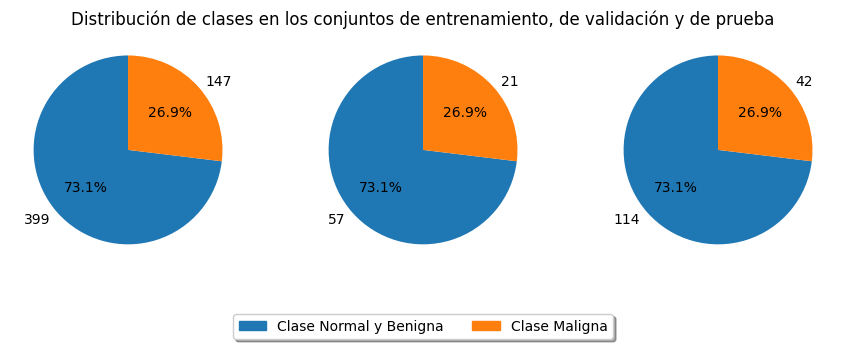

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

train_counts = pd.Series(y_train).value_counts()
wedges1, texts1, autotexts1 = axes[0].pie(train_counts, labels=train_counts.values, autopct='%1.1f%%', startangle=90)

val_counts = pd.Series(y_val).value_counts()
wedges3, texts3, autotexts3 = axes[1].pie(val_counts, labels=val_counts.values, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribución de clases en los conjuntos de entrenamiento, de validación y de prueba')

test_counts = pd.Series(y_test).value_counts()
wedges2, texts2, autotexts2 = axes[2].pie(test_counts, labels=test_counts.values, autopct='%1.1f%%', startangle=90)

handles = [plt.Rectangle((0,0),1,1, color=c) for c in plt.cm.tab10(np.arange(len(train_counts)))]
labels = ['Clase Normal y Benigna', 'Clase Maligna']
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=len(train_counts))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


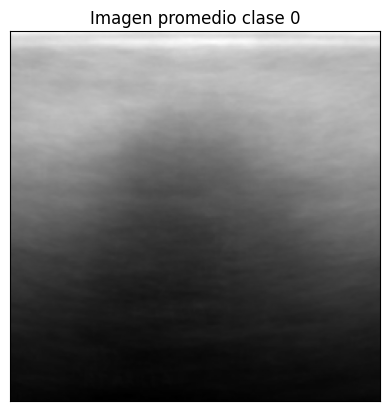

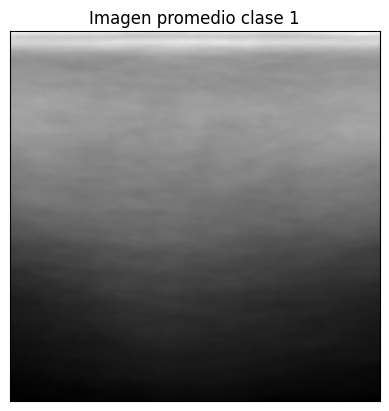

In [ ]:
class_0 = np.array([img for img, label in datasetCompleto if label == 0])
class_1 = np.array([img for img, label in datasetCompleto if label == 1])

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

plt.title('Imagen promedio clase 0')
plt.xticks([])
plt.yticks([])
plt.imshow(mean_0.squeeze(), cmap='gray')

plt.show()

plt.imshow(mean_1.squeeze(), cmap='gray')
plt.title('Imagen promedio clase 1')
plt.xticks([])
plt.yticks([])

plt.show()

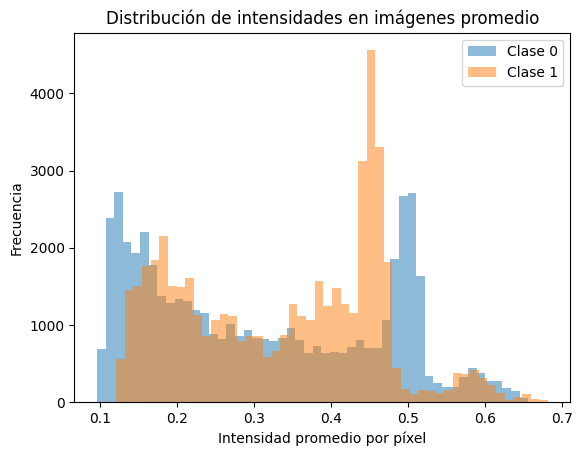

Clase 0 - Bajo: 52.06074617346939 % Medio: 47.93925382653061 % Alto: 0.0 %
Clase 1 - Bajo: 41.392299107142854 % Medio: 58.607700892857146 % Alto: 0.0 %


In [ ]:
class_0 = np.array([img for img, label in datasetCompleto if label == 0])
class_1 = np.array([img for img, label in datasetCompleto if label == 1])

mean_0 = np.mean(class_0, axis=0)
mean_1 = np.mean(class_1, axis=0)

plt.hist(mean_0.ravel(), bins=50, alpha=0.5, label='Clase 0')
plt.hist(mean_1.ravel(), bins=50, alpha=0.5, label='Clase 1')
plt.xlabel('Intensidad promedio por píxel')
plt.ylabel('Frecuencia')
plt.title('Distribución de intensidades en imágenes promedio')
plt.legend()
plt.show()

def porcentaje_en_rango(imagen, low, high):
    total = imagen.size
    en_rango = np.logical_and(imagen >= low, imagen <= high).sum()
    return 100 * en_rango / total

r0_bajo = porcentaje_en_rango(mean_0, 0.0, 0.3)
r0_medio = porcentaje_en_rango(mean_0, 0.3, 0.7)
r0_alto = porcentaje_en_rango(mean_0, 0.7, 1.0)

r1_bajo = porcentaje_en_rango(mean_1, 0.0, 0.3)
r1_medio = porcentaje_en_rango(mean_1, 0.3, 0.7)
r1_alto = porcentaje_en_rango(mean_1, 0.7, 1.0)

print("Clase 0 - Bajo:", r0_bajo, "% Medio:", r0_medio, "% Alto:", r0_alto, "%")
print("Clase 1 - Bajo:", r1_bajo, "% Medio:", r1_medio, "% Alto:", r1_alto, "%")



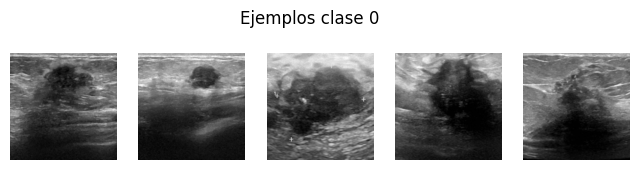

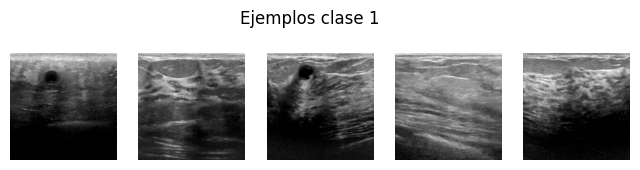

In [ ]:
samples_0 = random.sample([img for img, label in datasetCompleto if label == 0], 5)
samples_1 = random.sample([img for img, label in datasetCompleto if label == 1], 5)
fig, axs = plt.subplots(1, 5, figsize=(8, 2))
for i, img in enumerate(samples_0):
    axs[i].imshow(img.squeeze(), cmap='gray')
    axs[i].axis('off')
fig.suptitle('Ejemplos clase 0')
plt.show()

fig, axs = plt.subplots(1, 5, figsize=(8, 2))
for i, img in enumerate(samples_1):
    axs[i].imshow(img.squeeze(), cmap='gray')
    axs[i].axis('off')
fig.suptitle('Ejemplos clase 1')
plt.show()